In [10]:
#Įsikeliame reikalingas bibliotekas


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

import keras
import cv2
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [2]:
X = np.load('X.npy')
y = np.load('y.npy')

In [3]:
X.shape

(25000, 64, 64, 3)

In [4]:
y.shape

(25000, 4)

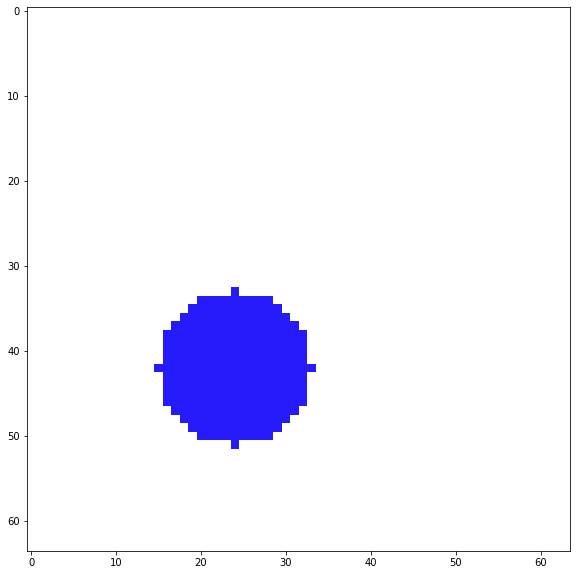

In [8]:
plt.imshow(X[105])

In [12]:
test_img = cv2.rectangle(X[0], (y[0][0], y[0][1]), (y[0][2], y[0][3]), color=(255, 0, 0), thickness=1)

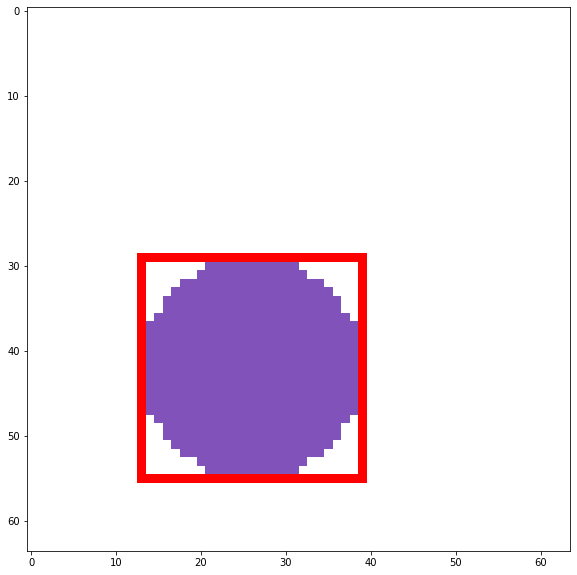

In [13]:
plt.imshow(test_img)

In [14]:
X = X/255
y = y/64

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, shuffle= True)

In [17]:
y_test = y_valid[:1000]
y_valid = y_valid[1000:]
X_test = X_valid[:1000]
X_valid = X_valid[1000:]

In [18]:
print(X_test.shape)
print(X_valid.shape)

(1000, 64, 64, 3)
(1500, 64, 64, 3)


In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=6, kernel_size=(5, 5), input_shape=X[0].shape, activation='relu'))
model.add(keras.layers.AveragePooling2D())
model.add(keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(keras.layers.AveragePooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(80, activation='relu'))
model.add(keras.layers.Dense(4))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 60, 60, 6)         456       
_________________________________________________________________
average_pooling2d_2 (Average (None, 30, 30, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 80)                216400    
_________________________________________________________________
dense_3 (Dense)              (None, 4)                

In [21]:
h = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=32)

Epoch 1/10
704/704 [==============================] - 56s 80ms/step - loss: 0.0051 - accuracy: 0.9072 - val_loss: 7.3139e-04 - val_accuracy: 0.9613
Epoch 2/10
704/704 [==============================] - 41s 59ms/step - loss: 9.3529e-04 - accuracy: 0.9556 - val_loss: 5.4126e-04 - val_accuracy: 0.9673
Epoch 3/10
704/704 [==============================] - 41s 58ms/step - loss: 5.2862e-04 - accuracy: 0.9624 - val_loss: 0.0021 - val_accuracy: 0.9347
Epoch 4/10
 47/704 [=>............................] - ETA: 37s - loss: 0.0011 - accuracy: 0.9515- ETA: 38s - loss: 0.0013 - acc

KeyboardInterrupt: 

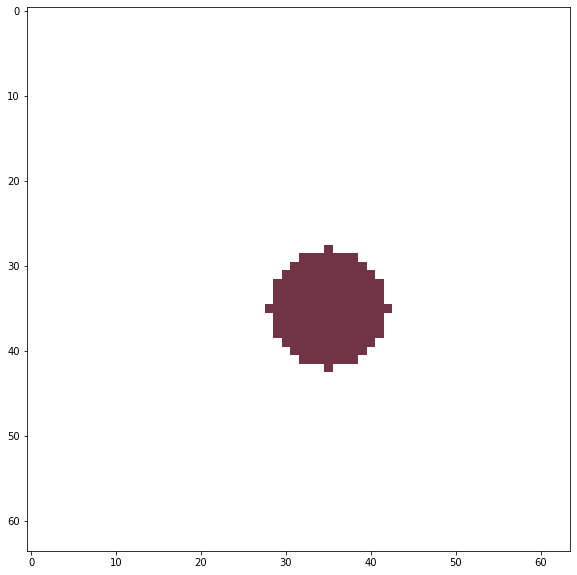

In [22]:
plt.imshow(X_test[0])

In [24]:
y_pred = model.predict(X_test[0][np.newaxis])

In [26]:
y_pred = y_pred*64

In [29]:
y_pred = [int(y_p) for y_p in y_pred[0]]

In [30]:
y_pred

[26, 27, 41, 42]

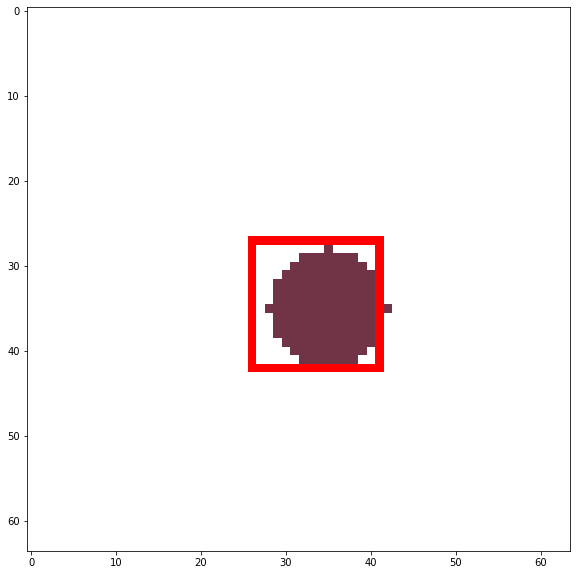

In [34]:
test_img = cv2.rectangle(X_test[0], (y_pred[0], y_pred[1]), (y_pred[2], y_pred[3]), color=(1, 0, 0), thickness=1)
plt.imshow(test_img)